## Module 6 Homework: Decision Trees and Ensemble Learning
By Shanice Williams

### Dataset

In this homework, we continue using the fuel efficiency dataset.
Download it from <a href='https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv'>here</a>.

You can do it with wget:

```bash
wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
```

The goal of this homework is to create a regression model for predicting the car fuel efficiency (column `'fuel_efficiency_mpg'`).

In [1]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv

--2025-11-04 10:27:33--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 874188 (854K) [text/plain]
Saving to: ‘car_fuel_efficiency.csv’

car_fuel_efficiency 100%[===================>] 853.70K  --.-KB/s    in 0.01s   

2025-11-04 10:27:33 (61.6 MB/s) - ‘car_fuel_efficiency.csv’ saved [874188/874188]



In [2]:
# Imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("./assets/car_fuel_efficiency.csv")

In [4]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


### Preparing the dataset 

Preparation:

* Fill missing values with zeros.
* Do train/validation/test split with 60%/20%/20% distribution. 
* Use the `train_test_split` function and set the `random_state` parameter to 1.
* Use `DictVectorizer(sparse=True)` to turn the dataframes into matrices.



In [5]:
df.isnull().sum()

engine_displacement      0
num_cylinders          482
horsepower             708
vehicle_weight           0
acceleration           930
model_year               0
origin                   0
fuel_type                0
drivetrain               0
num_doors              502
fuel_efficiency_mpg      0
dtype: int64

In [6]:
df = df.fillna(0)

In [7]:
df.isnull().sum()

engine_displacement    0
num_cylinders          0
horsepower             0
vehicle_weight         0
acceleration           0
model_year             0
origin                 0
fuel_type              0
drivetrain             0
num_doors              0
fuel_efficiency_mpg    0
dtype: int64

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [11]:
df_full_train.shape, df_test.shape, df_train.shape, df_val.shape

((7763, 11), (1941, 11), (5822, 11), (1941, 11))

In [12]:
df_full_train = df_full_train.reset_index(drop=True)
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [13]:
y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

In [14]:
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [15]:
from sklearn.feature_extraction import DictVectorizer

In [18]:
dicts_train = df_train.to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(dicts_train)

dicts_val = df_val.to_dict(orient='records')
X_val = dv.transform(dicts_val)

## Question 1

Let's train a decision tree regressor to predict the `fuel_efficiency_mpg` variable. 

* Train a model with `max_depth=1`.

Which feature is used for splitting the data?

* `'vehicle_weight'` [X]
* `'model_year'`
* `'origin'`
* `'fuel_type'`


In [26]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [19]:
dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,1
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [22]:
y_pred = dt.predict(X_val)

[Text(0.5, 0.75, 'vehicle_weight <= 3022.107\nsquared_error = 6.398\nsamples = 5822\nvalue = 14.994'),
 Text(0.25, 0.25, 'squared_error = 2.575\nsamples = 3034\nvalue = 16.882'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'squared_error = 2.453\nsamples = 2788\nvalue = 12.938'),
 Text(0.625, 0.5, '  False')]

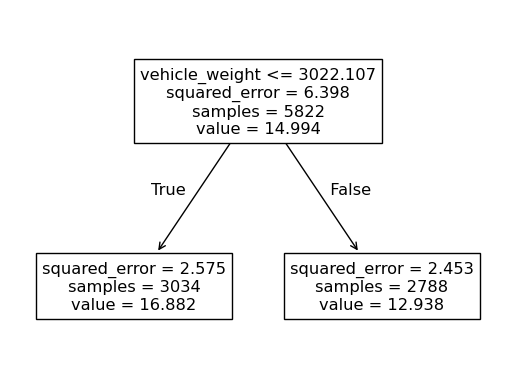

In [27]:
plot_tree(dt,feature_names=dv.get_feature_names_out())

## Question 2

Train a random forest regressor with these parameters:

* `n_estimators=10`
* `random_state=1`
* `n_jobs=-1` (optional - to make training faster)


What's the RMSE of this model on the validation data?

* 0.045
* 0.45 [X]
* 4.5
* 45.0

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error

In [29]:
rf = RandomForestRegressor(n_estimators=10, random_state=1)
rf.fit(X_train, y_train)

,n_estimators,10
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [31]:
y_pred = rf.predict(X_val)

In [32]:
root_mean_squared_error(y_val, y_pred)

0.4599777557336148

## Question 3

Now let's experiment with the `n_estimators` parameter

* Try different values of this parameter from 10 to 200 with step 10.
* Set `random_state` to `1`.
* Evaluate the model on the validation dataset.


After which value of `n_estimators` does RMSE stop improving?
Consider 3 decimal places for calculating the answer.

- 10
- 25
- 80
- 200 [X]

If it doesn't stop improving, use the latest iteration number in
your answer.

In [33]:
scores = []
for n in range(10, 201, 10):
    rf = RandomForestRegressor(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_val)
    rmse = root_mean_squared_error(y_val, y_pred)
    scores.append((n, rmse))

In [36]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'rmse'])
# df_scores.sort_values(by='rsme', ascending=False).head()
df_scores

,n_estimators,rmse
0,10,0.459978
1,20,0.453659
2,30,0.450743
3,40,0.448007
4,50,0.446151
5,60,0.445266
6,70,0.444610
7,80,0.444893
8,90,0.444724
9,100,0.444318


<Axes: xlabel='n_estimators', ylabel='rmse'>

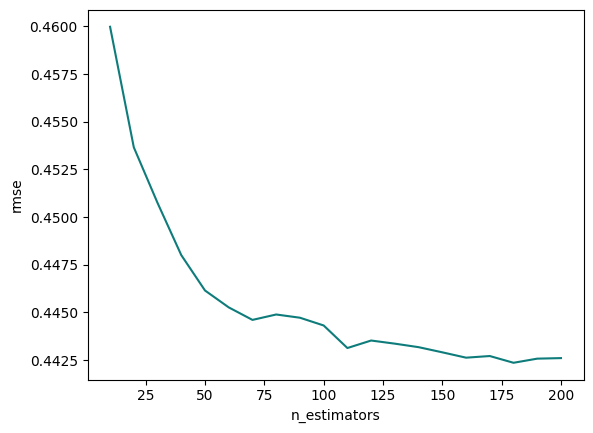

In [37]:
sns.lineplot(data=df_scores, x='n_estimators', y='rmse', color='#0E7C7BFF')
# plt.title("min_samples_leaf of 1 and n_estimators of 90 leads to best AUC\n")

## Question 4

Let's select the best `max_depth`:

* Try different values of `max_depth`: `[10, 15, 20, 25]`
* For each of these values,
  * try different values of `n_estimators` from 10 till 200 (with step 10)
  * calculate the mean RMSE 
* Fix the random seed: `random_state=1`


What's the best `max_depth`, using the mean RMSE?

* 10 [X]
* 15
* 20
* 25

In [38]:
depths = [10, 15, 20, 25]

In [39]:
scores = []
for d in depths:
    for n in range(10, 201, 10):
        rf = RandomForestRegressor(n_estimators=n, max_depth=d, random_state=1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_val)
        rmse = root_mean_squared_error(y_val, y_pred)
        scores.append((n, d, rmse))

In [42]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'max_depth', 'rmse'])
df_scores.sort_values(by='rmse', ascending=True).head()

,n_estimators,max_depth,rmse
17,180,10,0.439837
19,200,10,0.439942
18,190,10,0.439982
15,160,10,0.439997
14,150,10,0.440128


Text(0.5, 1.0, 'max_depth of 10 and n_estimators of 180 leads to best RMSE\n')

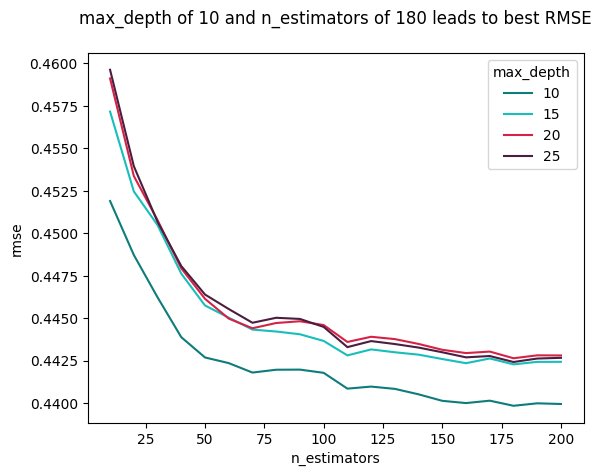

In [44]:
cmap = ['#0E7C7BFF', '#17BEBBFF', '#D62246FF', '#4B1D3FFF']
sns.lineplot(data=df_scores, x='n_estimators', y='rmse', hue='max_depth', palette=cmap)
plt.title("max_depth of 10 and n_estimators of 180 leads to best RMSE\n")

# Question 5

We can extract feature importance information from tree-based models. 

At each step of the decision tree learning algorithm, it finds the best split. 
When doing it, we can calculate "gain" - the reduction in impurity before and after the split. 
This gain is quite useful in understanding what are the important features for tree-based models.

In Scikit-Learn, tree-based models contain this information in the
[`feature_importances_`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor.feature_importances_)
field. 

For this homework question, we'll find the most important feature:

* Train the model with these parameters:
  * `n_estimators=10`,
  * `max_depth=20`,
  * `random_state=1`,
  * `n_jobs=-1` (optional)
* Get the feature importance information from this model


What's the most important feature (among these 4)? 

* `vehicle_weight` [X]
*	`horsepower`
* `acceleration`
* `engine_displacement`	


In [45]:
rf = RandomForestRegressor(n_estimators=10, 
                           max_depth=20, 
                           random_state=1
                           )
rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)
# rmse = root_mean_squared_error(y_val, y_pred)

In [48]:
feature_names = dv.get_feature_names_out()

In [49]:
feature_names

array(['acceleration', 'drivetrain=All-wheel drive',
       'drivetrain=Front-wheel drive', 'engine_displacement',
       'fuel_type=Diesel', 'fuel_type=Gasoline', 'horsepower',
       'model_year', 'num_cylinders', 'num_doors', 'origin=Asia',
       'origin=Europe', 'origin=USA', 'vehicle_weight'], dtype=object)

In [51]:
importances = rf.feature_importances_

In [52]:
feature_importances = pd.Series(importances, index=feature_names)

In [53]:
feature_importances

acceleration                    0.011471
drivetrain=All-wheel drive      0.000382
drivetrain=Front-wheel drive    0.000312
engine_displacement             0.003269
fuel_type=Diesel                0.000344
fuel_type=Gasoline              0.000337
horsepower                      0.016040
model_year                      0.003182
num_cylinders                   0.002359
num_doors                       0.001591
origin=Asia                     0.000476
origin=Europe                   0.000520
origin=USA                      0.000555
vehicle_weight                  0.959162
dtype: float64

## Question 6

Now let's train an XGBoost model! For this question, we'll tune the `eta` parameter:

* Install XGBoost
* Create DMatrix for train and validation
* Create a watchlist
* Train a model with these parameters for 100 rounds:

```
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
```

Now change `eta` from `0.3` to `0.1`.

Which eta leads to the best RMSE score on the validation dataset?

* 0.3
* 0.1 [X]
* Both give equal value


In [54]:
import xgboost as xgb

In [55]:
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=list(dv.get_feature_names_out()))
dval = xgb.DMatrix(X_val, label=y_val, feature_names=list(dv.get_feature_names_out()))

In [56]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [63]:
scores = {}
etas = [0.1, 0.3]

In [64]:
for eta in etas:
    evals_result = {}
    

    xgb_params = {
        'eta': eta, 
        'max_depth': 6,
        'min_child_weight': 1,
        
        'objective': 'reg:squarederror',
        'eval_metric': 'rmse',
        # 'nthread': 8,
        
        'seed': 1,
        'verbosity': 1,
    }

    model = xgb.train(xgb_params, dtrain, evals=watchlist,  num_boost_round=200, evals_result=evals_result,)

    df_score = pd.DataFrame({
        'num_iter': range(1, len(evals_result['train']['rmse']) + 1),
        'train_rmse': evals_result['train']['rmse'],
        'val_rmse': evals_result['val']['rmse']
    })

    scores[f'eta={eta}'] = df_score

[0]	train-rmse:2.28944	val-rmse:2.34561
[1]	train-rmse:2.07396	val-rmse:2.12434
[2]	train-rmse:1.88066	val-rmse:1.92597
[3]	train-rmse:1.70730	val-rmse:1.74987
[4]	train-rmse:1.55163	val-rmse:1.59059
[5]	train-rmse:1.41247	val-rmse:1.44988
[6]	train-rmse:1.28796	val-rmse:1.32329
[7]	train-rmse:1.17660	val-rmse:1.20930
[8]	train-rmse:1.07736	val-rmse:1.10830
[9]	train-rmse:0.98883	val-rmse:1.02009
[10]	train-rmse:0.91008	val-rmse:0.94062
[11]	train-rmse:0.84030	val-rmse:0.87100
[12]	train-rmse:0.77874	val-rmse:0.80916
[13]	train-rmse:0.72417	val-rmse:0.75465
[14]	train-rmse:0.67626	val-rmse:0.70780
[15]	train-rmse:0.63402	val-rmse:0.66672
[16]	train-rmse:0.59690	val-rmse:0.63062
[17]	train-rmse:0.56447	val-rmse:0.60016
[18]	train-rmse:0.53619	val-rmse:0.57383
[19]	train-rmse:0.51138	val-rmse:0.55044
[20]	train-rmse:0.48983	val-rmse:0.53064
[21]	train-rmse:0.47135	val-rmse:0.51451
[22]	train-rmse:0.45501	val-rmse:0.49998
[23]	train-rmse:0.44120	val-rmse:0.48790
[24]	train-rmse:0.42929	va

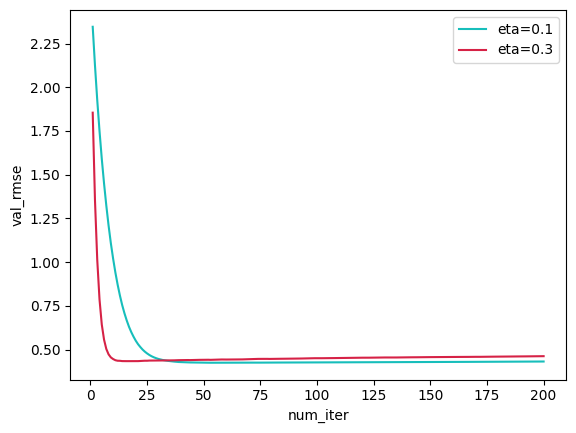

In [65]:
cmap = ['#17BEBBFF', '#D62246FF']

for c, (key, df_score) in zip(cmap, scores.items()):
    sns.lineplot(x=df_score.num_iter, y=df_score.val_rmse, label=key, color=c)

# plt.title("eta=0.05 results in the highest validation AUC")

In [67]:
for (key, df_score) in scores.items():
    print(f"{key}: {df_score.val_rmse.min()}")

eta=0.1: 0.4242625629140815
eta=0.3: 0.4334861295405598


## Submit the results

* Submit your results here: https://courses.datatalks.club/ml-zoomcamp-2025/homework/hw06
* If your answer doesn't match options exactly, select the closest one. If the answer is exactly in between two options, select the higher value.